### 1、赛前准备

#### 1.1 前言
本次赛事由开源学习组织Datawhale主办，主要带领学习者利用Python进行数据分析以及数据可视化，包含数据集的处理、数据探索与清晰、数据分析、数据可视化四部分，利用pandas、matplotlib、wordcloud等第三方库带大家玩转数据分析～还有丰富礼品等你来领取哦～
</br>学习赛事地址：https://tianchi.aliyun.com/competition/entrance/531837/introduction
#### 1.2 数据集来源介绍
**所有候选人信息** 
</br>该文件为每个候选人提供一份记录，并显示候选人的信息、总收入、从授权委员会收到的转账、付款总额、给授权委员会的转账、库存现金总额、贷款和债务以及其他财务汇总信息。
</br>数据字段描述详细:https://www.fec.gov/campaign-finance-data/all-candidates-file-description/
</br>关键字段说明
- CAND_ID 候选人ID
- CAND_NAME 候选人姓名
- CAND_PTY_AFFILIATION 候选人党派

</br>数据来源:https://www.fec.gov/files/bulk-downloads/2020/weball20.zip

**候选人委员会链接信息** 
</br>该文件显示候选人的身份证号码、候选人的选举年份、联邦选举委员会选举年份、委员会识别号、委员会类型、委员会名称和链接标识号。
</br>信息描述详细:https://www.fec.gov/campaign-finance-data/candidate-committee-linkage-file-description/
</br>关键字段说明
- CAND_ID 候选人ID
- CAND_ELECTION_YR 候选人选举年份
- CMTE_ID 委员会ID

</br>数据来源:https://www.fec.gov/files/bulk-downloads/2020/ccl20.zip

**个人捐款档案信息** 
【注意】由于文件较大，本数据集只包含2020.7.22-2020.8.20的相关数据，如果需要更全数据可以通过数据来源中的地址下载。
</br>该文件包含有关收到捐款的委员会、披露捐款的报告、提供捐款的个人、捐款日期、金额和有关捐款的其他信息。
</br>信息描述详细:[https://www.fec.gov/campaign-finance-data/contributions-individuals-file-description/](https://www.fec.gov/campaign-finance-data/contributions-individuals-file-description/)
</br>关键字段说明
- CMTE_ID  委员会ID
- NAME 捐款人姓名
- CITY 捐款人所在市
- State 捐款人所在州
- EMPLOYER 捐款人雇主/公司
- OCCUPATION 捐款人职业

</br>数据来源:https://www.fec.gov/files/bulk-downloads/2020/indiv20.zip

#### 1.3 需要提前安装的包

In [1]:
# wordcloud 依赖于 numpy, pillow
!pip install numpy pillow --user
# 安装词云处理包wordcloud
!pip install wordcloud --user


Looking in indexes: https://mirrors.aliyun.com/pypi/simple
Looking in indexes: https://mirrors.aliyun.com/pypi/simple


#### 1.4 需要提前下载好数据集
【注意】如果你只是在天池技术圈看到本文，你需要先查看[赛事指南](https://tianchi.aliyun.com/competition/entrance/531837/tab/227)。
</br>通过[赛事指南](https://tianchi.aliyun.com/competition/entrance/531837/tab/227)提示操作你可以成功`Fork`赛事论坛的baseline到你的天池实验室，并点击`编辑`按钮成功跳转到了DSW在线编程。
</br>在进行数据处理前，你需要点击DSW左侧`天池`tab，下载本案例数据集`2020_US_President_political_contributions`，后续步骤才能正确执行。
</br>
![](https://img.alicdn.com/tfs/TB1lceDl5pE_u4jSZKbXXbCUVXa-969-466.png)

### 2、数据处理
进行数据处理前，我们需要知道我们最终想要的数据是什么样的，因为我们是想分析候选人与捐赠人之间的关系，所以我们想要一张数据表中有捐赠人与候选人一一对应的关系，所以需要将目前的三张数据表进行一一关联，汇总到需要的数据。

#### 2.1 将委员会和候选人一一对应，通过`CAND_ID`关联两个表
由于候选人和委员会的联系表中无候选人姓名，只有候选人ID（`CAND_ID`），所以需要通过`CAND_ID`从候选人表中获取到候选人姓名，最终得到候选人与委员会联系表`ccl`。

In [2]:
# 导入相关处理包
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# 读取候选人信息，由于原始数据没有表头，需要添加表头
candidates = pd.read_csv("weball20.txt", sep = '|',names=['CAND_ID','CAND_NAME','CAND_ICI','PTY_CD','CAND_PTY_AFFILIATION','TTL_RECEIPTS',
                                                          'TRANS_FROM_AUTH','TTL_DISB','TRANS_TO_AUTH','COH_BOP','COH_COP','CAND_CONTRIB',
                                                          'CAND_LOANS','OTHER_LOANS','CAND_LOAN_REPAY','OTHER_LOAN_REPAY','DEBTS_OWED_BY',
                                                          'TTL_INDIV_CONTRIB','CAND_OFFICE_ST','CAND_OFFICE_DISTRICT','SPEC_ELECTION','PRIM_ELECTION','RUN_ELECTION'
                                                          ,'GEN_ELECTION','GEN_ELECTION_PRECENT','OTHER_POL_CMTE_CONTRIB','POL_PTY_CONTRIB',
                                                          'CVG_END_DT','INDIV_REFUNDS','CMTE_REFUNDS'])
# 读取候选人和委员会的联系信息
ccl = pd.read_csv("ccl.txt", sep = '|',names=['CAND_ID','CAND_ELECTION_YR','FEC_ELECTION_YR','CMTE_ID','CMTE_TP','CMTE_DSGN','LINKAGE_ID'])

In [4]:
# 关联两个表数据
ccl = pd.merge(ccl,candidates)
# 提取出所需要的列
ccl = pd.DataFrame(ccl, columns=[ 'CMTE_ID','CAND_ID', 'CAND_NAME','CAND_PTY_AFFILIATION'])

数据字段说明：
- CMTE_ID：委员会ID
- CAND_ID：候选人ID
- CAND_NAME：候选人姓名
- CAND_PTY_AFFILIATION：候选人党派

In [5]:
# 查看目前ccl数据前10行
ccl.head(10)

,CMTE_ID,CAND_ID,CAND_NAME,CAND_PTY_AFFILIATION
0,C00697789,H0AL01055,"CARL, JERRY LEE, JR",REP
1,C00701557,H0AL01063,"LAMBERT, DOUGLAS WESTLEY III",REP
2,C00701409,H0AL01071,"PRINGLE, CHRISTOPHER PAUL",REP
3,C00703066,H0AL01089,"HIGHTOWER, BILL",REP
4,C00708867,H0AL01097,"AVERHART, JAMES",DEM
5,C00710947,H0AL01105,"GARDNER, KIANI A",DEM
6,C00722512,H0AL01121,"CASTORANI, JOHN",REP
7,C00725069,H0AL01139,"COLLINS, FREDERICK G. RICK'",DEM
8,C00462143,H0AL02087,"ROBY, MARTHA",REP
9,C00493783,H0AL02087,"ROBY, MARTHA",REP


#### 2.2 将候选人和捐赠人一一对应，通过`CMTE_ID`关联两个表
通过`CMTE_ID`将目前处理好的候选人和委员会关系表与人捐款档案表进行关联，得到候选人与捐赠人一一对应联系表`cil`。

In [6]:
# 读取个人捐赠数据，由于原始数据没有表头，需要添加表头
# 提示：读取本文件大概需要5-10s
itcont = pd.read_csv('itcont_2020_20200722_20200820.txt', sep='|',names=['CMTE_ID','AMNDT_IND','RPT_TP','TRANSACTION_PGI',
                                                                                  'IMAGE_NUM','TRANSACTION_TP','ENTITY_TP','NAME','CITY',
                                                                                  'STATE','ZIP_CODE','EMPLOYER','OCCUPATION','TRANSACTION_DT',
                                                                                  'TRANSACTION_AMT','OTHER_ID','TRAN_ID','FILE_NUM','MEMO_CD',
                                                                                  'MEMO_TEXT','SUB_ID'])

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,15,16,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# 将候选人与委员会关系表ccl和个人捐赠数据表itcont合并，通过 CMTE_ID
c_itcont =  pd.merge(ccl,itcont)
# 提取需要的数据列
c_itcont = pd.DataFrame(c_itcont, columns=[ 'CAND_NAME','NAME', 'STATE','EMPLOYER','OCCUPATION',
                                           'TRANSACTION_AMT', 'TRANSACTION_DT','CAND_PTY_AFFILIATION'])

**数据说明**
- CAND_NAME – 接受捐赠的候选人姓名
- NAME – 捐赠人姓名
- STATE – 捐赠人所在州
- EMPLOYER – 捐赠人所在公司
- OCCUPATION – 捐赠人职业
- TRANSACTION_AMT – 捐赠数额（美元）
- TRANSACTION_DT – 收到捐款的日期
- CAND_PTY_AFFILIATION – 候选人党派

In [8]:
# 查看目前数据前10行
c_itcont.head(3)

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"MORGAN, JOSEPH DAVID","MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,7242020,REP
1,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7242020,REP
2,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,7312020,REP


### 3、数据探索与清洗

进过数据处理部分，我们获得了可用的数据集，现在我们可以利用调用`shape`属性查看数据的规模，调用`info`函数查看数据信息，调用`describe`函数查看数据分布。

In [9]:
# 查看数据规模 多少行 多少列
print(c_itcont.shape)
print(c_itcont.head(2))

(756205, 8)
              CAND_NAME                NAME STATE     EMPLOYER OCCUPATION  \
0  MORGAN, JOSEPH DAVID  MARTIN, WILLIAM II    AZ      RETIRED    RETIRED   
1  MORGAN, JOSEPH DAVID  RODRIGUEZ, GERARDO    AZ  VA HOSPITAL   LAB TECH   

   TRANSACTION_AMT  TRANSACTION_DT CAND_PTY_AFFILIATION  
0              100         7242020                  REP  
1               40         7242020                  REP  


In [10]:
import pickle

def pkl_save(saveDf, fileName):
    with open("c_itcont.pkl", "wb") as f:
        pickle.dump(saveDf, f)
        
pkl_save(c_itcont,'c_itcont')



In [11]:
# 查看整体数据信息，包括每个字段的名称、非空数量、字段的数据类型
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CAND_NAME             756205 non-null  object
 1   NAME                  756205 non-null  object
 2   STATE                 756160 non-null  object
 3   EMPLOYER              737413 non-null  object
 4   OCCUPATION            741294 non-null  object
 5   TRANSACTION_AMT       756205 non-null  int64 
 6   TRANSACTION_DT        756205 non-null  int64 
 7   CAND_PTY_AFFILIATION  756205 non-null  object
dtypes: int64(2), object(6)
memory usage: 51.9+ MB


通过上面的探索我们知道目前数据集的一些基本情况，目前数据总共有756205行，8列，总占用内存51.9+MB，`STATE`、`EMPLOYER`、`OCCUPATION`有缺失值，另外日期列目前为int64类型，需要进行转换为str类型。

In [12]:
#空值处理，统一填充 NOT PROVIDED
## 由于这三项都是类别型变量，也可以考虑用重视填充，不过这样就会引入误差。

for feat in ['STATE','EMPLOYER','OCCUPATION']:
    c_itcont[feat] = c_itcont[feat].fillna('Not Provided')

In [13]:
# 对日期TRANSACTION_DT列进行处理
c_itcont['TRANSACTION_DT'] = c_itcont['TRANSACTION_DT'].astype(str)
# 将日期格式改为年月日   7242020	 -->   2020724
# c_itcont['TRANSACTION_DT'] = [i[3:7]+i[0]+i[1:3] for i in c_itcont['TRANSACTION_DT']]
c_itcont['TRANSACTION_DT'] = c_itcont['TRANSACTION_DT'].apply(lambda x: x[3:7]+x[0]+x[1:3])

c_itcont['TRANSACTION_DT']

0         2020724
1         2020724
2         2020731
3         2020810
4         2020807
           ...   
756200    2020815
756201    2020802
756202    2020803
756203    2020803
756204    2020804
Name: TRANSACTION_DT, Length: 756205, dtype: object

In [14]:
# 再次查看数据信息
c_itcont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756205 entries, 0 to 756204
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   CAND_NAME             756205 non-null  object
 1   NAME                  756205 non-null  object
 2   STATE                 756205 non-null  object
 3   EMPLOYER              756205 non-null  object
 4   OCCUPATION            756205 non-null  object
 5   TRANSACTION_AMT       756205 non-null  int64 
 6   TRANSACTION_DT        756205 non-null  object
 7   CAND_PTY_AFFILIATION  756205 non-null  object
dtypes: int64(1), object(7)
memory usage: 51.9+ MB


In [15]:
# 查看数据前3行
c_itcont.head(3)

,CAND_NAME,NAME,STATE,EMPLOYER,OCCUPATION,TRANSACTION_AMT,TRANSACTION_DT,CAND_PTY_AFFILIATION
0,"MORGAN, JOSEPH DAVID","MARTIN, WILLIAM II",AZ,RETIRED,RETIRED,100,2020724,REP
1,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,2020724,REP
2,"MORGAN, JOSEPH DAVID","RODRIGUEZ, GERARDO",AZ,VA HOSPITAL,LAB TECH,40,2020731,REP


In [16]:
# 查看数据表中数据类型的列的数据分布情况
c_itcont.describe()

,TRANSACTION_AMT
count,7.562050e+05
mean,1.504307e+02
std,2.320452e+03
min,-5.600000e+03
25%,2.000000e+01
50%,3.500000e+01
75%,1.000000e+02
max,1.500000e+06


In [17]:
# 查看单列的数据发布情况
for f in ['CAND_NAME', 'NAME', 'STATE', 'EMPLOYER', 'OCCUPATION',
       'TRANSACTION_DT', 'CAND_PTY_AFFILIATION']:
    print('--------------',f,'-----------------')
    print(c_itcont[f].describe())

-------------- CAND_NAME -----------------
count                 756205
unique                   312
top       BIDEN, JOSEPH R JR
freq                  507816
Name: CAND_NAME, dtype: object
-------------- NAME -----------------
count              756205
unique             326352
top       CAMPBELL, JANET
freq                  165
Name: NAME, dtype: object
-------------- STATE -----------------
count     756205
unique        63
top           CA
freq      127895
Name: STATE, dtype: object
-------------- EMPLOYER -----------------
count           756205
unique           93605
top       NOT EMPLOYED
freq            227547
Name: EMPLOYER, dtype: object
-------------- OCCUPATION -----------------
count           756205
unique           26498
top       NOT EMPLOYED
freq            224109
Name: OCCUPATION, dtype: object
-------------- TRANSACTION_DT -----------------
count      756205
unique         30
top       2020820
freq        56010
Name: TRANSACTION_DT, dtype: object
-------------- CAND_

- 对于类别型特征，df.describe(),可以显示该类别的 类别数，top1的类别，这些对分析都会有一定的提示作用。

### 4、数据分析

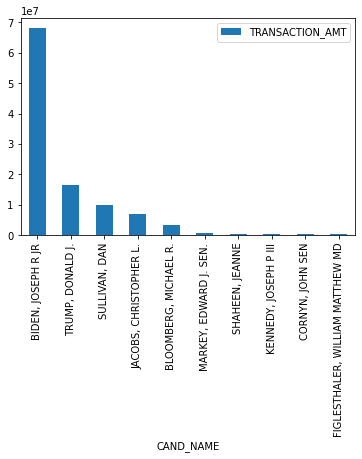

<AxesSubplot:>

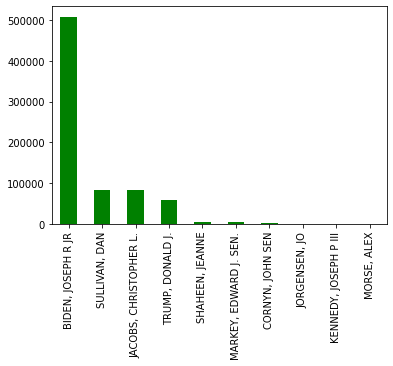

In [18]:
# 候选人获得捐款总数统计和人数统计
top_candidate = c_itcont.groupby('CAND_NAME') .sum().sort_values("TRANSACTION_AMT",ascending=False).head(10)

num_candidate = c_itcont.CAND_NAME.value_counts().head(10)

top_candidate.plot(kind = 'bar')
plt.show()
num_candidate.plot(kind = 'bar',color = 'g')

- 很有意思的是，支持TRUMP的人数并不是top2的，但是获得捐款数是top2.
- SULLIVAN的支持者为top2,而获得捐款总数为top3.
- 是否说明支持SULLIVAN的人没有太多土豪和暗操作呢？

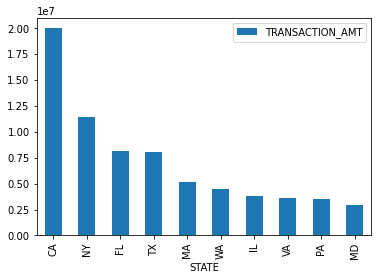

<AxesSubplot:xlabel='STATE'>

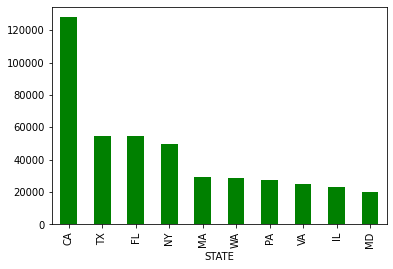

In [19]:
# 各州总捐款数可视化
st_amt = c_itcont.groupby('STATE').sum().sort_values("TRANSACTION_AMT",ascending=False)[:10]
st_amt =pd.DataFrame(st_amt, columns=['TRANSACTION_AMT'])
st_amt.plot(kind='bar')
plt.show()
# 各州捐款总人数可视化，取前10个州的数据
st_amt = c_itcont.groupby('STATE').size().sort_values(ascending=False).head(10)
st_amt.plot(kind='bar', color = 'g')

- CA 加州 捐款总数最多，但是CA的捐款人数也最多。

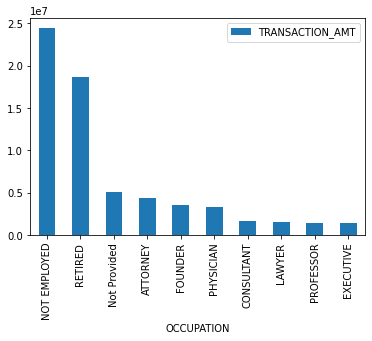

<AxesSubplot:>

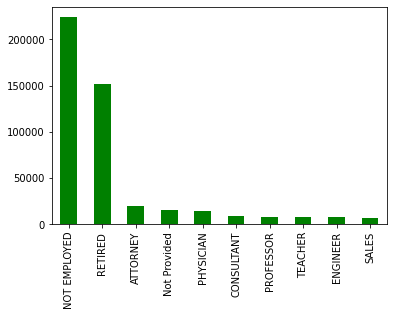

In [20]:
# 捐赠人职业
top_occupation = c_itcont.groupby('OCCUPATION') .sum().sort_values("TRANSACTION_AMT",ascending=False).head(10)

num_occupation = c_itcont.OCCUPATION.value_counts().head(10)

top_occupation.plot(kind = 'bar')
plt.show()
num_occupation.plot(kind = 'bar',color = 'g')

- 我们发现 自由职业者，退休 人员的捐款数最多，但是人数也最多。如果不同时查看人数，便很容易引起误解。
- 其他比如像：律师、创始人、医生、顾问、教授、主管这些高薪人才虽然捐款总人数少，但是捐款总金额也占据了很大比例。

<AxesSubplot:xlabel='CAND_PTY_AFFILIATION'>

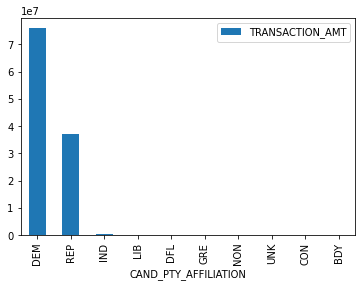

In [21]:
top_affiliation = c_itcont.groupby('CAND_PTY_AFFILIATION').sum().sort_values(by = 'TRANSACTION_AMT',ascending = False).head(10)

top_affiliation.plot(kind = 'bar')

获得捐赠最多的党派有`DEM(民主党)`、`REP(共和党)`，分别对应`BIDEN, JOSEPH R JR(拜登)`和`TRUMP, DONALD J.(特朗普)`，从我们目前分析的2020.7.22-2020.8.20这一个月的数据来看，在选民的捐赠数据中拜登代表的民主党完胜特朗普代表的共和党，由于完整数据量过大，所以没有对所有数据进行汇总分析，因此也不能确定11月大选公布结果就一定是拜登当选

### 4、数据可视化


#### 4.1 热门候选人拜登在各州的获得的捐赠占比

array([<AxesSubplot:ylabel='TRANSACTION_AMT'>], dtype=object)

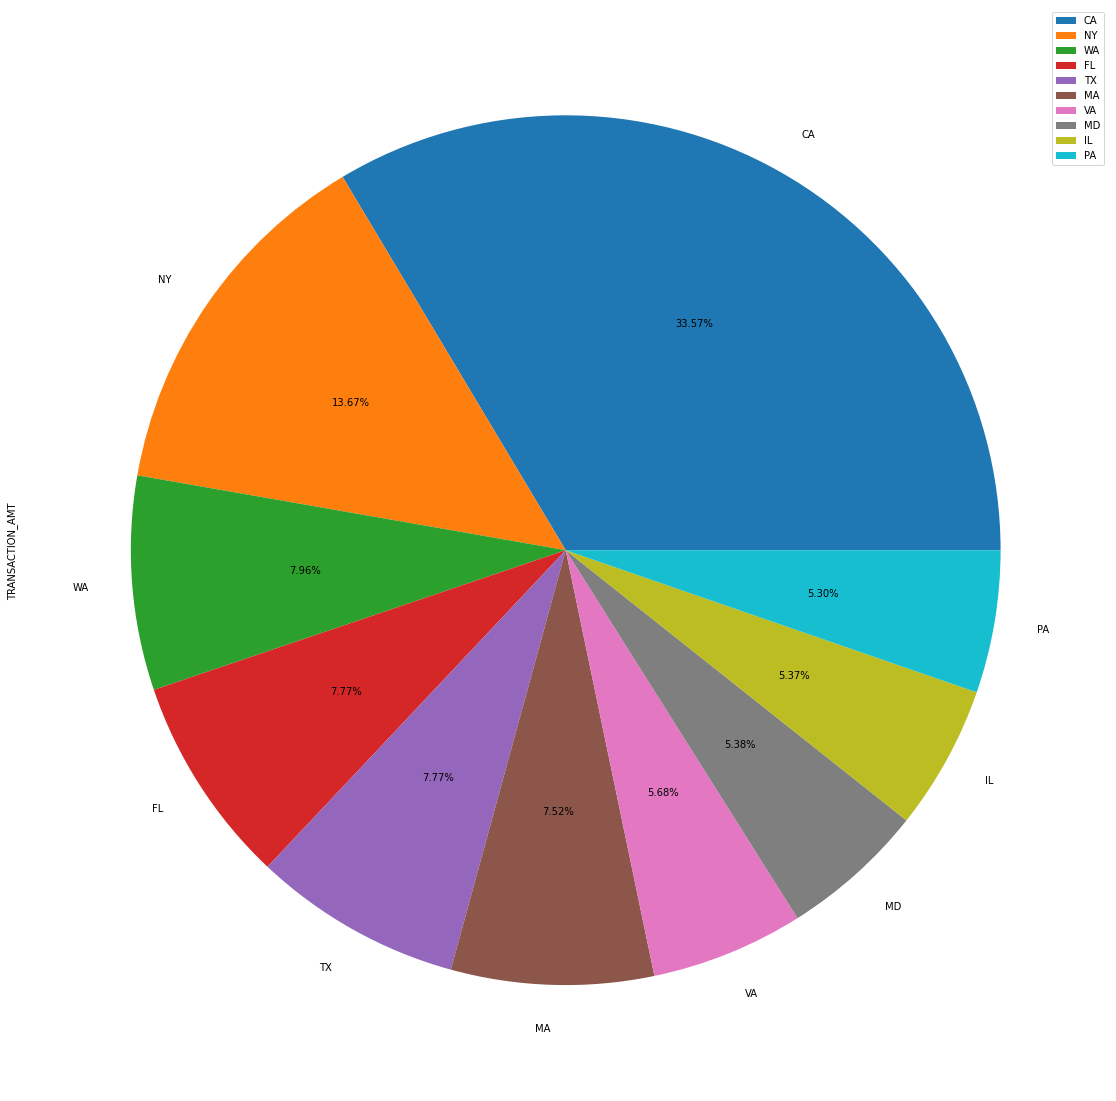

In [22]:
# 从所有数据中取出支持拜登的数据
biden = c_itcont[c_itcont['CAND_NAME']=='BIDEN, JOSEPH R JR']
# 统计各州对拜登的捐款总数
biden_state = biden.groupby('STATE').sum().sort_values("TRANSACTION_AMT", ascending=False).head(10)
# 饼图可视化各州捐款数据占比
biden_state.plot.pie(figsize=(20, 20),autopct='%0.2f%%',subplots=True)

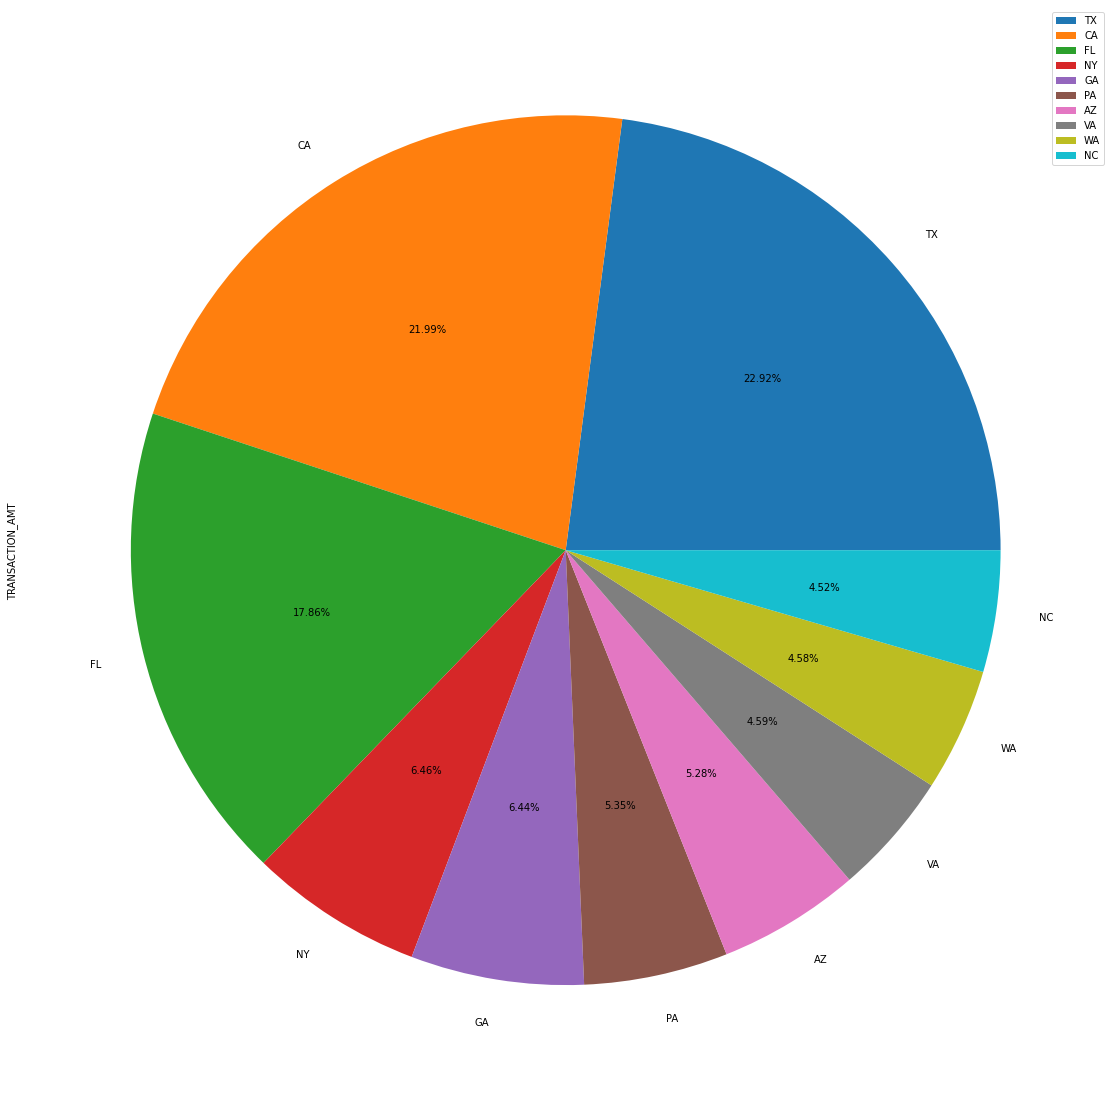

In [23]:
## 统计特朗普 来自各州的捐款总数
trump = c_itcont.loc[c_itcont.CAND_NAME == 'TRUMP, DONALD J.', :].copy()

trump_state = trump.groupby('STATE').sum().sort_values(by = 'TRANSACTION_AMT',ascending = False).head(10)


trump_state.plot(kind = 'pie',
                figsize = (20,20),
                autopct = '%0.2f%%',
                subplots = True)
plt.show()

#### 4.3 总捐最多的候选人捐赠者词云图
通过数据分析中获得捐赠总额前三的候选人统计中可以看出拜登在2020.7.22-2020.8.20这期间获得捐赠的总额是最多的，所以我们以拜登为原模型，制作词云图。

In [24]:
# 首先下载图片模型,这里提供的是已经处理好的图片，有兴趣的选手可以自己写代码进行图片处理
# 处理结果：需要将人图像和背景颜色分离，并纯色填充，词云才会只显示在人图像区域
# 拜登原图：https://img.alicdn.com/tfs/TB1pUcwmZVl614jSZKPXXaGjpXa-689-390.jpg
# 拜登处理后图片：https://img.alicdn.com/tfs/TB10Jx4pBBh1e4jSZFhXXcC9VXa-689-390.jpg
# 特朗普原图：https://img.alicdn.com/tfs/TB1D0l4pBBh1e4jSZFhXXcC9VXa-298-169.jpg
# 特朗普处理后图片：https://img.alicdn.com/tfs/TB1BoowmZVl614jSZKPXXaGjpXa-298-169.jpg
# 这里我们先下载处理后的图片
!wget https://img.alicdn.com/tfs/TB10Jx4pBBh1e4jSZFhXXcC9VXa-689-390.jpg

--2020-12-22 18:16:16--  https://img.alicdn.com/tfs/TB10Jx4pBBh1e4jSZFhXXcC9VXa-689-390.jpg
Resolving img.alicdn.com (img.alicdn.com)... 101.226.26.254, 101.226.26.253
Connecting to img.alicdn.com (img.alicdn.com)|101.226.26.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4236 (4.1K) [image/jpeg]
Saving to: ‘TB10Jx4pBBh1e4jSZFhXXcC9VXa-689-390.jpg’

100%[======================================>] 4,236       --.-K/s   in 0s      

2020-12-22 18:16:16 (641 MB/s) - ‘TB10Jx4pBBh1e4jSZFhXXcC9VXa-689-390.jpg’ saved [4236/4236]



In [25]:
# 由于下载图片文件名过长，我们对文件名进行重命名
import os
os.rename('TB10Jx4pBBh1e4jSZFhXXcC9VXa-689-390.jpg', 'biden.jpg')

In [26]:
# 如果有兴趣，可以在上面下载原图后进行图片处理
# 拜登原图：https://img.alicdn.com/tfs/TB1pUcwmZVl614jSZKPXXaGjpXa-689-390.jpg
# 拜登处理后图片：https://img.alicdn.com/tfs/TB10Jx4pBBh1e4jSZFhXXcC9VXa-689-390.jpg
'''
你的图片处理代码
'''




'\n你的图片处理代码\n'

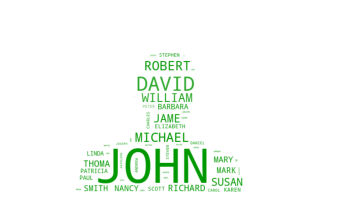

In [27]:
# 导入词云库
from wordcloud import WordCloud,ImageColorGenerator

# 在4.2 热门候选人拜登在各州的获得的捐赠占比 中我们已经取出了所有支持拜登的人的数据，存在变量：biden中
# 将所有捐赠者姓名连接成一个字符串
data = ' '.join(biden["NAME"].tolist())
# 读取图片文件
bg = plt.imread("biden.jpg")
# 生成
wc = WordCloud(# FFFAE3
    background_color="white",  # 设置背景为白色，默认为黑色
    width=890,  # 设置图片的宽度
    height=600,  # 设置图片的高度
    mask=bg,    # 画布
    margin=10,  # 设置图片的边缘
    max_font_size=100,  # 显示的最大的字体大小
    random_state=20,  # 为每个单词返回一个PIL颜色
).generate_from_text(data)
# 图片背景
bg_color = ImageColorGenerator(bg)
# 开始画图
plt.imshow(wc.recolor(color_func=bg_color))
# 为云图去掉坐标轴
plt.axis("off")
# 画云图，显示
# 保存云图
wc.to_file("biden_wordcloud.png")

<AxesSubplot:ylabel='STATE'>

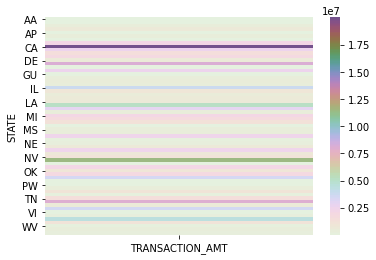

In [28]:
# 按州总捐款热力地图
'''
参赛选手自由发挥、补充
第一个补充热力地图的参赛选手可以获得天池杯子一个
'''
## sns.heatmap

import seaborn as sns

## 设置 barcolor
cmap = sns.cubehelix_palette(start = 1, rot =5, gamma = 0.5, as_cmap = True)

state = c_itcont.groupby('STATE').sum()

sns.heatmap(state, cmap = cmap)

<AxesSubplot:xlabel='TRANSACTION_DT'>

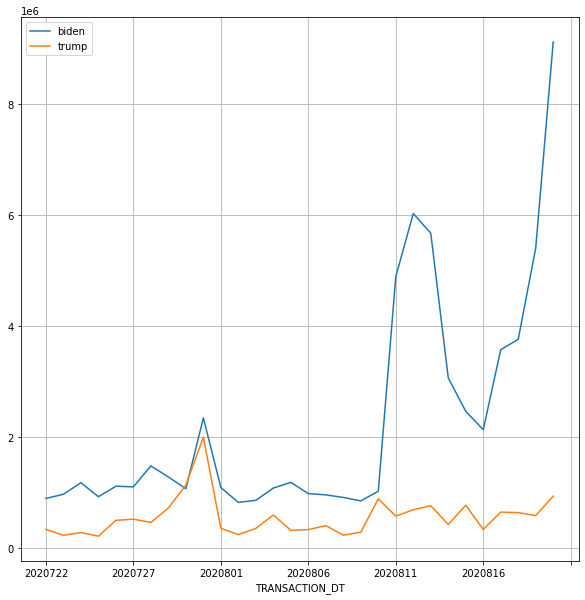

In [29]:
# 收到捐赠额最多的两位候选人的总捐赠额变化趋势
'''
参赛选手自由发挥、补充
第一个补充捐赠额变化趋势图的参赛选手可以获得天池杯子一个
'''
BIDEN = c_itcont.loc[(c_itcont.CAND_NAME == 'BIDEN, JOSEPH R JR'),:].copy()
TRUMP = c_itcont.loc[(c_itcont.CAND_NAME == 'TRUMP, DONALD J.'),:].copy()

daily_biden = BIDEN.groupby('TRANSACTION_DT').sum()
daily_biden = pd.DataFrame.from_dict(daily_biden)

daily_trump = TRUMP.groupby('TRANSACTION_DT').sum()
daily_trump = pd.DataFrame.from_dict(daily_trump)


daily = pd.merge(daily_biden, daily_trump, on = 'TRANSACTION_DT')
daily = daily.rename(columns = {'TRANSACTION_AMT_x':'biden','TRANSACTION_AMT_y':'trump'})

# plt.figure()
daily.plot(figsize = (10,10),
          grid = True)


- BIDEN 的获得的捐款数一路走高，而TRUMP则一直差不多，说明BIDEN逐渐获得较高的支持。

<AxesSubplot:xlabel='TRANSACTION_DT'>

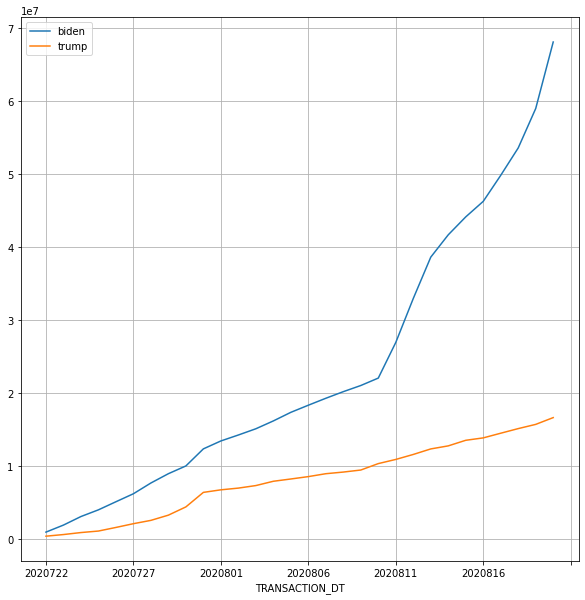

In [30]:
# 其他可视化方向
'''
参赛选手自由发挥、补充
官方将选取5个创新可视化的选手，送出天池杯子一个
'''

BIDEN = c_itcont.loc[(c_itcont.CAND_NAME == 'BIDEN, JOSEPH R JR'),:].copy()
TRUMP = c_itcont.loc[(c_itcont.CAND_NAME == 'TRUMP, DONALD J.'),:].copy()

daily_biden = BIDEN.groupby('TRANSACTION_DT').sum()
daily_biden = pd.DataFrame.from_dict(daily_biden)

daily_trump = TRUMP.groupby('TRANSACTION_DT').sum()
daily_trump = pd.DataFrame.from_dict(daily_trump)


daily = pd.merge(daily_biden, daily_trump, on = 'TRANSACTION_DT')
daily = daily.rename(columns = {'TRANSACTION_AMT_x':'biden','TRANSACTION_AMT_y':'trump'})

daily_cumsum = daily.cumsum()


# plt.figure()
daily_cumsum.plot(figsize = (10,10),
          grid = True)







## 查看那些更愿意支持BIDEN, 哪些更愿意支持TRUMP

<AxesSubplot:ylabel='STATE,CAND_NAME'>

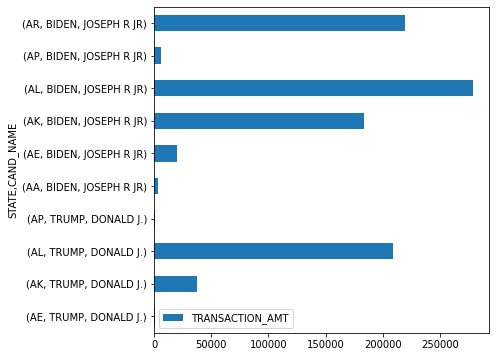

In [37]:
# STATE trends
BIDEN_TRUMP = c_itcont.loc[(c_itcont.CAND_NAME == 'BIDEN, JOSEPH R JR')|(c_itcont.CAND_NAME == 'TRUMP, DONALD J.')].copy()
state_trend = pd.pivot_table(BIDEN_TRUMP, 
                             index = ['STATE','CAND_NAME'], 
                             values = ['TRANSACTION_AMT'],
                             aggfunc = 'sum')


state_trend.head(10).sort_values(by = 'CAND_NAME', ascending = False).plot(kind = 'barh',figsize = (6,6))


- 大部分捐款来自AL,AK,AR
- AR, AL,AK 中的更多支持BIDEN
- AL,AK 也是支持TRUMP的大比例，但是低于BIDEN。